# Mnist MLP

## Import Modules

In [116]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import numpy as np
from PIL import Image

## Load Data

Load the MNIST dataset using the Keras API. Visualize some of the data.

In [117]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

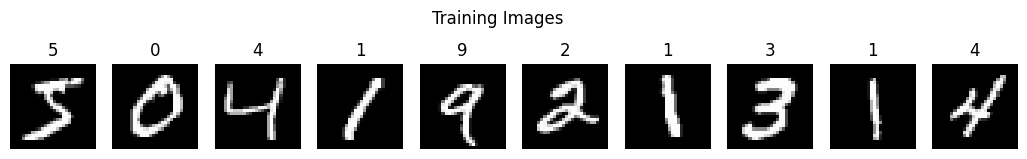

In [118]:
# Visualize some of the data
def plot_images(images, labels, title):
    plt.figure(figsize=(13, 2))  # Size of the plot
    plt.suptitle(title)  # Set the title of the plot
    for i in range(10):  # Plot the first 10 images
        plt.subplot(1, 10, i + 1)  # Create a subplot with 1 row and 10 columns and select the i+1-th position
        plt.imshow(images[i], cmap='gray')  # Show the i-th image in the plot and set the colormap to gray
        plt.title(labels[i])  # Set the title of the i-th subplot to the label of the i-th image
        plt.axis('off')  # Disable the axis of the plot
    plt.show()


plot_images(x_train, y_train[:10], "Training Images")

## Preprocess Data

The MNIST dataset consists of `70,000` `28x28` black-and-white images of handwritten digits extracted from two NIST databases. There are `60,000` images in the training dataset and `10,000` images in the validation dataset, one class per digit so a total of `10` classes, with `7,000` images (`6,000` train images and `1,000` test images) per class. Half of the image were drawn by Census Bureau employees and the other half by high school students (this split is evenly distributed in the training and testing sets).

### Flatten Before Normalize

MLP requires the features to be a **1D-vector**. To fit this requirement, the `28*28` images need to be flattened into a **1D-vector** and normalized to a value between `0` and `1`. The labels also need to be converted into a `1x10` array where each row is a one-hot vector.

In [119]:
# Flatten the data and normalize
x_train = x_train.astype('float32').reshape(-1,
                                            784) / 255.0  # Flatten the images to 1x784 arrays, -1 means that the size of that dimension is determined by the other dimensions and the provided value.
x_test = x_test.astype('float32').reshape(-1, 784) / 255.0

In [120]:
# Convert labels to one-hot vectors
y_train = tf.keras.utils.to_categorical(y_train, 10)  # Convert the labels to one-hot vectors
y_test = tf.keras.utils.to_categorical(y_test,
                                       10)  # One-hot encode means that each label is represented as a vector of length 10 where the index of the 1 is the value of the digit. For example, the label `5` would be `[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]`.

In [121]:
print(y_train[:10])
print(y_test[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


## Create the Model

In [122]:
model = Sequential({
    Dense(256, activation='relu', input_shape=(784,)),  # Create a model with 128 neurons in the first hidden layer
    Dense(256, activation='relu'),  # Create a model with 128 neurons in the second hidden layer
    Dense(10, activation='softmax')  # Create a model with 10 neurons in the output layer
})

## Compile the Model

In [123]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[
    'accuracy'])  # Compile the model with the Adam optimizer, the categorical crossentropy loss function, and the accuracy metric

## Train the Model

In [124]:
model.fit(x_train, y_train, epochs=20, batch_size=128,
          validation_split=0.2)  # Train the model with 10 epochs, a batch size of 32, and a validation split of 20%. Validation split means that 20% of the training data will be used as validation data.

Epoch 1/20


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(128, 10), output.shape=(128, 256)

## Save the Model

In [ ]:
model.save("models/mnist_mlp.keras")  # Save the model to a file

## Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

## Make Predictions

In [ ]:
from PIL import Image
import os
import glob


def predict_handwriting(model_path, image_folder):
    # 加载训练好的模型
    saved_model = tf.keras.models.load_model(model_path)

    # 获取所有图片路径
    image_paths = glob.glob(os.path.join(image_folder, "*.png")) + \
                  glob.glob(os.path.join(image_folder, "*.jpg")) + \
                  glob.glob(os.path.join(image_folder, "*.jpeg"))

    if not image_paths:
        print(f"No images found in {image_folder}")
        return

    # 创建可视化布局（每行最多5张）
    num_images = len(image_paths)
    cols = 5
    rows = int(np.ceil(num_images / cols))
    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
    if rows == 1:
        axes = axes.reshape(1, -1)  # 处理单行情况

    # 设置全局标题
    fig.suptitle("Handwriting Digit Recognition Results", fontsize=16, y=1.02)

    for idx, img_path in enumerate(image_paths):
        try:
            # 预处理图像（匹配MNIST格式）
            img = Image.open(img_path).convert('L')  # 转为灰度
            img = img.resize((28, 28))  # 调整尺寸
            img_array = np.array(img)  # 转为numpy数组

            # 标准化处理（反转颜色 + 归一化）
            img_array = (255 - img_array) / 255.0  # 假设输入是黑底白字
            # img_array = img_array / 255.0  # 假设输入是白底黑字

            # 适配MLP模型输入形状 (1, 784)
            input_data = img_array.astype("float32").reshape(1, 784)

            # 进行预测
            predictions = saved_model.predict(input_data, verbose=0)
            pred_class = np.argmax(predictions)
            confidence = np.max(predictions)

            # 绘制结果
            ax = axes[idx // cols, idx % cols]
            ax.imshow(img, cmap='gray')  # 显示原始尺寸图像
            ax.set_title(f"Pred: {pred_class}\nProb: {confidence:.2f}")
            ax.axis("off")

        except Exception as e:
            print(f"Error processing {os.path.basename(img_path)}: {str(e)}")

    # 隐藏空白子图
    for j in range(len(image_paths), rows * cols):
        axes[j // cols, j % cols].axis("off")

    plt.tight_layout()
    plt.show()

In [ ]:
# 使用示例
predict_handwriting(
    model_path="models/mnist_mlp.keras",
    image_folder="images/handwriting"
)